In [2]:
%load_ext pycodestyle_magic
%flake8_on

In [3]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import axes3d
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, scale

## Problem 8

## Load Auto Data

In [161]:
auto = pd.read_csv(r"Data/Auto.csv", na_values="?")
auto.`dropna(inplace=True)  # Remove NAN values
auto.head()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [165]:
from sklearn.model_selection import train_test_split
print(auto.columns)

X = auto.drop(columns = 'mpg')
y = auto['mpg']
X_train, X_test, y_train, y_test = train_test_split(X,y)

4:22: E251 unexpected spaces around keyword / parameter equals
4:24: E251 unexpected spaces around keyword / parameter equals
6:54: E231 missing whitespace after ','


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')


### Problem 8a

In [168]:
auto_train = pd.concat([X_train,y_train], axis =1, )
auto_train.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg
185,4,98.0,79.0,2255,17.7,76,1,dodge colt,26.0
311,4,98.0,70.0,2120,15.5,80,1,chevrolet chevette,32.1
294,4,86.0,65.0,1975,15.2,79,3,maxda glc deluxe,34.1
318,4,134.0,90.0,2711,15.5,80,3,toyota corona liftback,29.8
225,6,250.0,110.0,3520,16.4,77,1,chevrolet concours,17.5


1:32: E231 missing whitespace after ','
1:47: E251 unexpected spaces around keyword / parameter equals


In [169]:
results = smf.ols("mpg ~ horsepower", data=auto_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     445.6
Date:                Tue, 25 Feb 2020   Prob (F-statistic):           1.06e-60
Time:                        15:24:32   Log-Likelihood:                -887.20
No. Observations:                 294   AIC:                             1778.
Df Residuals:                     292   BIC:                             1786.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.8035      0.832     47.816      0.000      38.165      41.442
horsepower    -0.1570      0.007    -21.109      0.000      -0.172      -0.142
==============================================================================
Omnibus:                       11.362   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.564
Skew:                           0.457   Prob(JB):                      0.00308
Kurtosis:                       3.330   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [171]:
predictions = results.get_prediction(pd.DataFrame({"horsepower": [98]}))
predictions.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.417251,0.294045,23.838534,24.995968,14.630932,34.203571


- Horsepower seems to be a signicant factor. 
- Strength is given by the coefficient? so it would be -0.1578
- the relationship is negative
- prediceted mp at horsepower of 98 is 24.46, confidence interval are [23.97,24.96] and pred iterval are [14.809, 34.1247]


### problem 8b

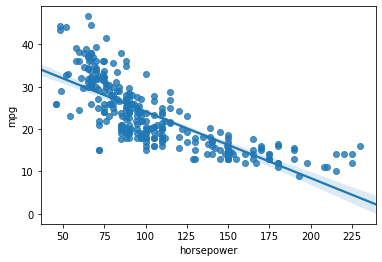

In [172]:
sns.regplot(auto_train["horsepower"], auto_train["mpg"])

### problem 8c

### Plot of residuals

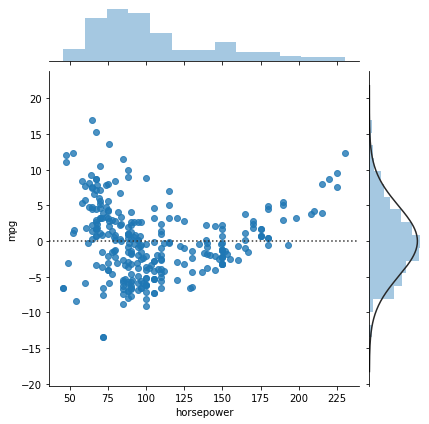

In [173]:
sns.jointplot(auto_train["horsepower"], auto_train["mpg"], kind="residual")

- Residual seem to be normal distributed.
- residuals are non-linear with horsepower, so we are not capturing this information in the linear model
- There seems to be no outliers or high leverage points

## Problem 9.2

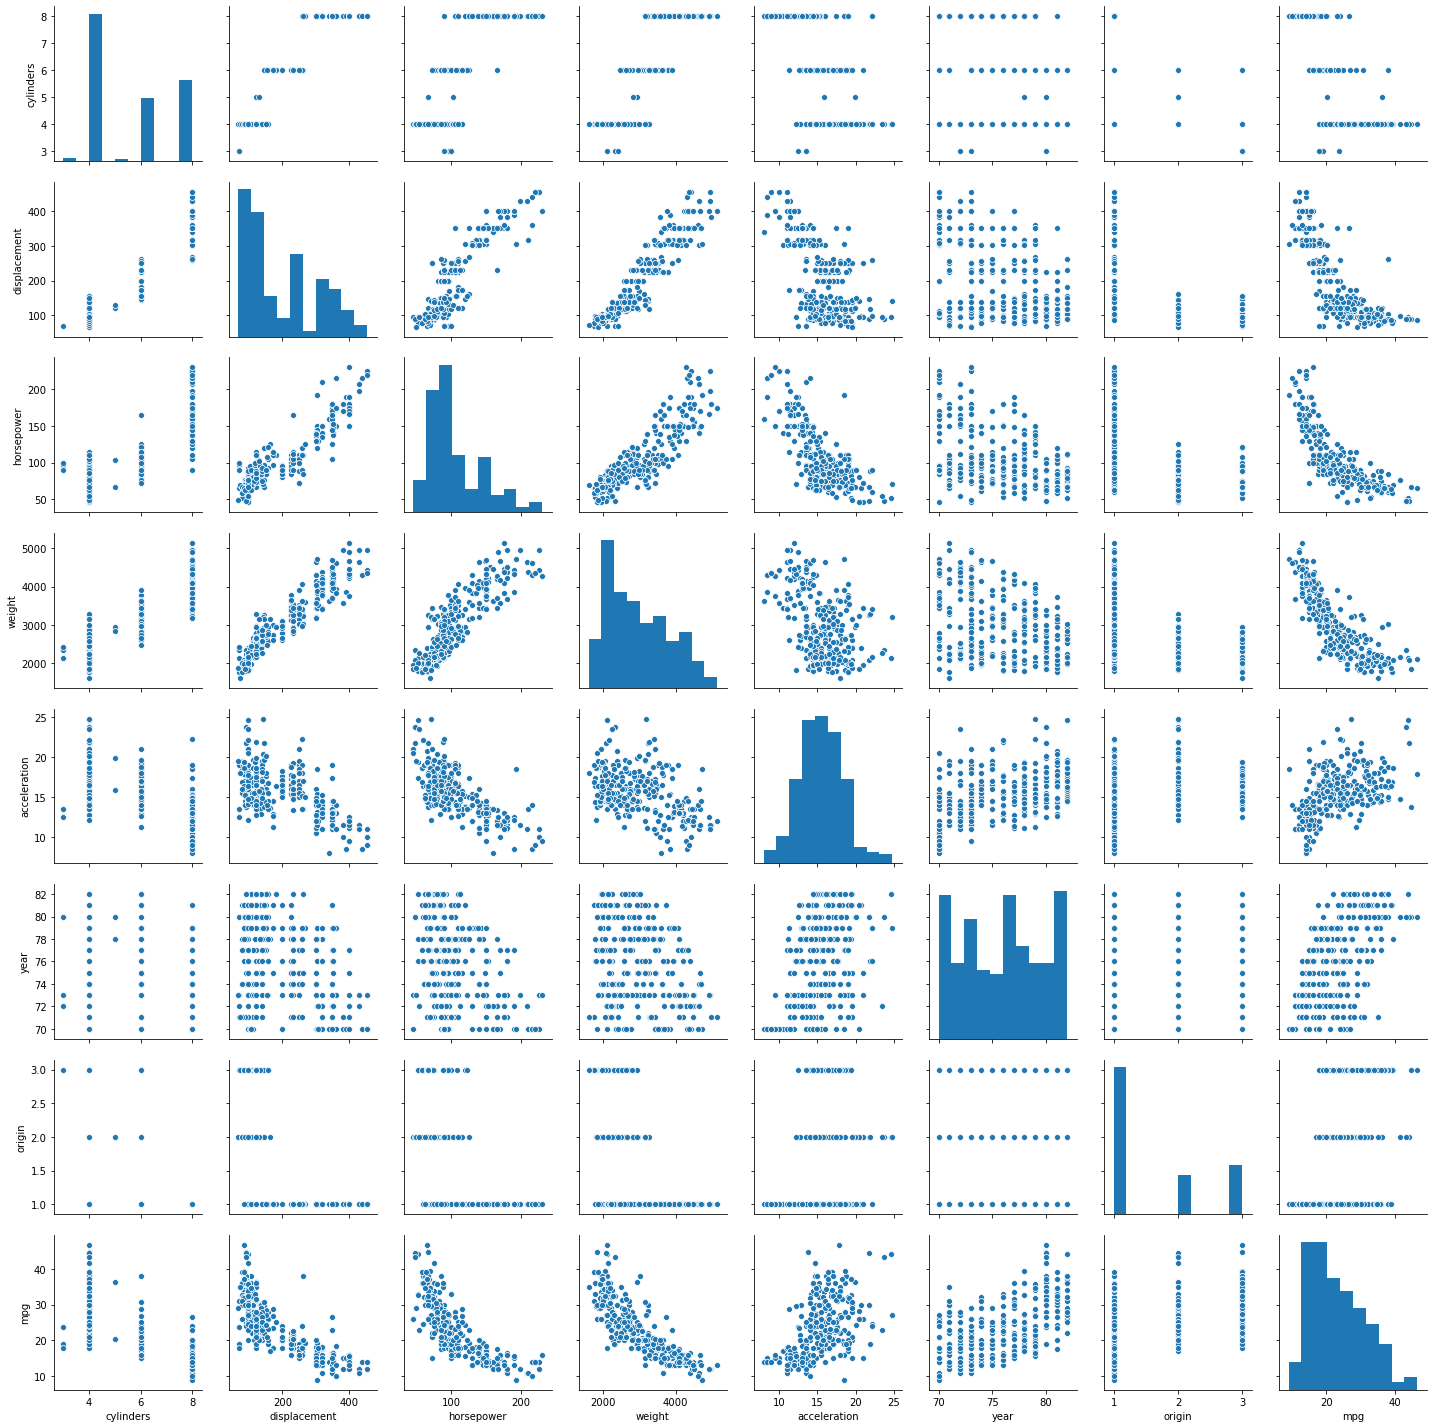

In [174]:
sns.pairplot(auto_train)

In [176]:
all_cols = "+ ".join(auto.columns.drop(["mpg", "name"]))

In [178]:
results_with_colinearity = smf.ols("mpg ~ " + all_cols, data=auto_train).fit()
results_with_colinearity.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     183.2
Date:                Tue, 25 Feb 2020   Prob (F-statistic):          9.60e-102
Time:                        15:27:00   Log-Likelihood:                -773.26
No. Observations:                 294   AIC:                             1563.
Df Residuals:                     286   BIC:                             1592.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -20.6822      5.425     -3.812      0.000     -31.361     -10.004
cylinders       -0.5636      0.378     -1.489      0.138      -1.309       0.181
displacement     0.0260      0.009      2.829      0.005       0.008       0.044
horsepower      -0.0092      0.017     -0.552      0.581      -0.042       0.024
weight          -0.0070      0.001     -8.386      0.000      -0.009      -0.005
acceleration     0.1893      0.121      1.571      0.117      -0.048       0.427
year             0.7686      0.060     12.829      0.000       0.651       0.887
origin           1.6399      0.330      4.962      0.000       0.989       2.290
==============================================================================
Omnibus:                       24.451   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.682
Skew:                           0.512   Prob(JB):                     1.47e-09
Kurtosis:                       4.508   Cond. No.                     8.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

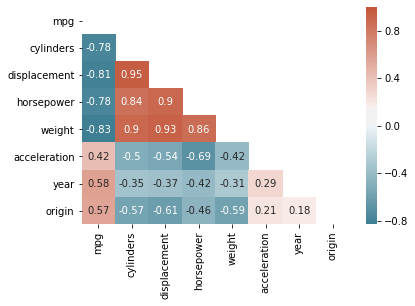

In [179]:
corr = auto.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
    corr,
    annot=True,
    cmap=sns.diverging_palette(220, 20, sep=20, as_cmap=True),
    mask=mask,
)

- There seems to be multicollinearity
- cyclinders, displacement, weight seems to be very correlated (with correlation of >= 0.9) We can replace all these factors and see it can be replaced with one, so we can use weight here and remove others.
- Acceleration does not seem to be signficant

In [181]:
all_cols_without_collinearity = "+ ".join(
    auto_train.columns.drop(["mpg", "name", "displacement", "cylinders", "horsepower", 'acceleration'])
)
all_cols_without_collinearity

'weight+ year+ origin'

2:80: E501 line too long (103 > 79 characters)


In [182]:
results_without_colinearity = smf.ols(
    "mpg ~ " + all_cols_without_collinearity, data=auto_train
).fit()
results_without_colinearity.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     414.6
Date:                Tue, 25 Feb 2020   Prob (F-statistic):          1.57e-104
Time:                        15:27:23   Log-Likelihood:                -778.55
No. Observations:                 294   AIC:                             1565.
Df Residuals:                     290   BIC:                             1580.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.1946      4.783     -4.222      0.000     -29.608     -10.781
weight        -0.0058      0.000    -18.627      0.000      -0.006      -0.005
year           0.7742      0.057     13.525      0.000       0.662       0.887
origin         1.3199      0.311      4.239      0.000       0.707       1.933
==============================================================================
Omnibus:                       31.481   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.743
Skew:                           0.581   Prob(JB):                     3.91e-14
Kurtosis:                       4.922   Cond. No.                     7.38e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Adjusted R^2 has seemed to decreased from 0.818 tp 0.755. But all the factors are signficant

### Diagnostics for this model

Text(0, 0.5, 'Count')

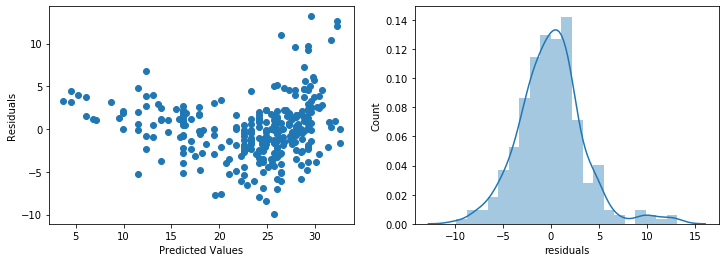

1:40: E231 missing whitespace after ','
1:52: E231 missing whitespace after ','


In [183]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax[0].scatter(results.predict(auto_train), results_without_colinearity.resid)
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Residuals')

sns.distplot(results_without_colinearity.resid, ax=ax[1])
ax[1].set_xlabel('residuals')
ax[1].set_ylabel('Count')

### There seems to be some trend in the residual.  Resisduals seems to be normally distruted

In [184]:
results_without_colinearity_interactions_trans = smf.ols(
    "mpg ~ np.power(weight,2) +  year + origin + weight:year", data=auto_train
).fit()
results_without_colinearity_interactions_trans.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     418.2
Date:                Tue, 25 Feb 2020   Prob (F-statistic):          7.95e-119
Time:                        15:27:48   Log-Likelihood:                -741.86
No. Observations:                 294   AIC:                             1494.
Df Residuals:                     289   BIC:                             1512.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -54.5309      4.503    -12.110      0.000     -63.393     -45.669
np.power(weight, 2)  1.842e-06   2.25e-07      8.181      0.000     1.4e-06    2.28e-06
year                    1.4951      0.078     19.065      0.000       1.341       1.649
origin                  0.5731      0.288      1.993      0.047       0.007       1.139
weight:year            -0.0002      2e-05    -12.012      0.000      -0.000      -0.000
==============================================================================
Omnibus:                       53.653   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.907
Skew:                           0.810   Prob(JB):                     6.26e-34
Kurtosis:                       6.139   Cond. No.                     2.79e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

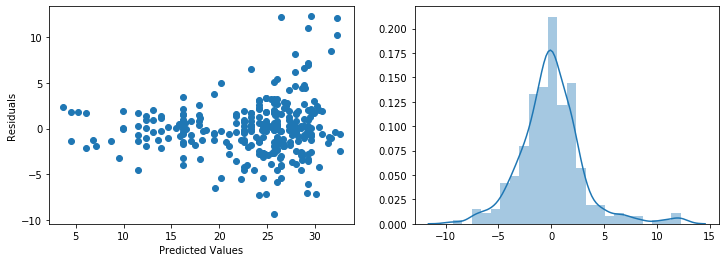

1:40: E231 missing whitespace after ','
1:52: E231 missing whitespace after ','
2:42: E231 missing whitespace after ','
2:80: E501 line too long (95 > 79 characters)


In [186]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(12,4))
ax[0].scatter(results.predict(auto_train),results_without_colinearity_interactions_trans.resid)
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Residuals')
sns.distplot(results_without_colinearity_interactions_trans.resid, ax=ax[1])

In [195]:
from sklearn.metrics import r2_score, mean_squared_error
train_pred = results_without_colinearity_interactions_trans.predict(X_train)
test_pred =  results_without_colinearity_interactions_trans.predict(X_test)

print(f'Train R^2 score {r2_score(y_train,train_pred)}, Mean Squared error: {mean_squared_error(y_train,train_pred)}')
print(f'Test R^2 score {r2_score(y_test,test_pred)}, Mean Squared Error: {mean_squared_error(y_test, test_pred)}')

3:12: E222 multiple spaces after operator
5:80: E501 line too long (118 > 79 characters)


Train R^2 score 0.8526979543875575, Mean Squared error: 9.104982062659161
Test R^2 score 0.8742717452100947, Mean Squared Error: 7.223305159502417


Text(0, 0.5, 'Error')

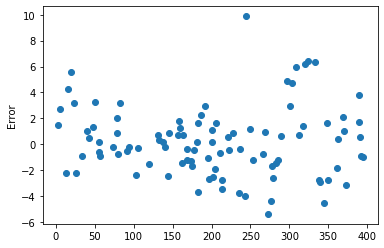

1:26: E231 missing whitespace after ','


In [208]:
plt.plot(y_test-test_pred,'o')
plt.ylabel('Error')

In [220]:
1 - mean_squared_error(y_test,test_pred)/mean_squared_error(y_test,np.mean(y_test)*np.ones(len(y_test)))

0.8742717452100947

1:30: E231 missing whitespace after ','
1:67: E231 missing whitespace after ','


In [218]:
np.mean(y_test)*np.ones(len(y_test))

array([23.79693878, 23.79693878, 23.79693878, 23.79693878, 23.79693878,
       23.79693878, 23.79693878, 23.79693878, 23.79693878, 23.79693878,
       23.79693878, 23.79693878, 23.79693878, 23.79693878, 23.79693878,
       23.79693878, 23.79693878, 23.79693878, 23.79693878, 23.79693878,
       23.79693878, 23.79693878, 23.79693878, 23.79693878, 23.79693878,
       23.79693878, 23.79693878, 23.79693878, 23.79693878, 23.79693878,
       23.79693878, 23.79693878, 23.79693878, 23.79693878, 23.79693878,
       23.79693878, 23.79693878, 23.79693878, 23.79693878, 23.79693878,
       23.79693878, 23.79693878, 23.79693878, 23.79693878, 23.79693878,
       23.79693878, 23.79693878, 23.79693878, 23.79693878, 23.79693878,
       23.79693878, 23.79693878, 23.79693878, 23.79693878, 23.79693878,
       23.79693878, 23.79693878, 23.79693878, 23.79693878, 23.79693878,
       23.79693878, 23.79693878, 23.79693878, 23.79693878, 23.79693878,
       23.79693878, 23.79693878, 23.79693878, 23.79693878, 23.79